In [1]:
from brian2 import *
%matplotlib inline

Text(0,0.5,'Neuron Index')

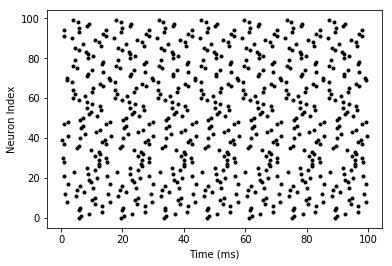

In [9]:
start_scope()

tau = 20*ms
eqs = '''
dv/dt = (2-v)/tau: 1 
'''

g = NeuronGroup(100, eqs, threshold='v > 1', reset='v = 0.0', refractory='5*ms', method='rk2')
#m = StateMonitor(g, 'v', record=True)
g.v = 'rand()'

sm = SpikeMonitor(g)
run(100*ms)

plot(sm.t/ms, sm.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron Index')

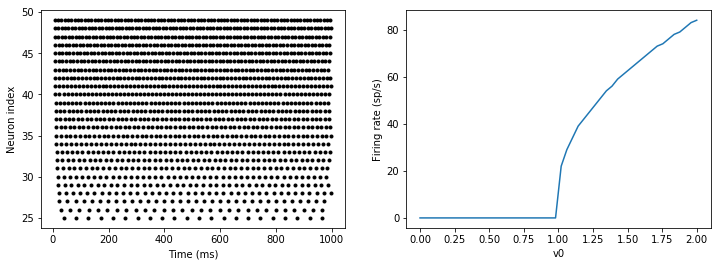

In [27]:
start_scope()

N = 50
tau = 10*ms
v0_max = 2.
duration = 1000*ms
eqs = '''
dv/dt = (v0-v)/tau : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='rk2')
G.v0 = 'i*v0_max/(N-1)'

M = SpikeMonitor(G)

run(1000*ms)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');

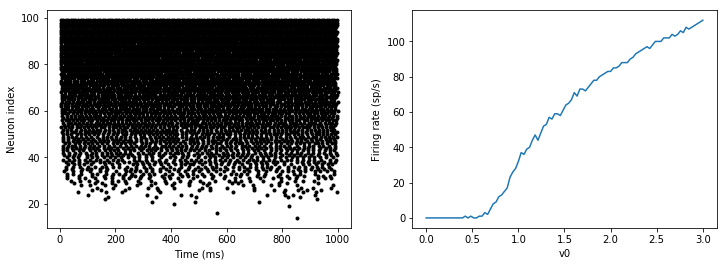

In [29]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms
sigma = 0.2

eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='euler')
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');

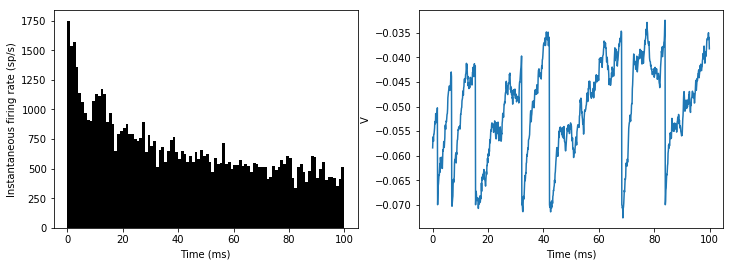

In [40]:
start_scope()

N = 1000
tau = 10*ms
vr = -70*mV
vt0 = -50*mV
delta_vt0 = 5*mV
tau_t = 100*ms
sigma = 0.5*(vt0-vr)
v_drive = 2*(vt0-vr)
duration = 100*ms

eqs = '''
dv/dt = (v_drive+vr-v)/tau + sigma*xi*tau**-0.5 : volt
dvt/dt = (vt0-vt)/tau_t : volt
'''

reset = '''
v = vr
vt += delta_vt0
'''

G = NeuronGroup(N, eqs, threshold='v>vt', reset=reset, refractory=5*ms, method='euler')
spikemon = SpikeMonitor(G)
statemon = StateMonitor(G, 'v', record=[0, 1])

G.v = 'rand()*(vt0-vr)+vr'
G.vt = vt0

run(duration)

figure(figsize=(12,4))
subplot(121)
_ = hist(spikemon.t/ms, 100, histtype='stepfilled', facecolor='k', weights=ones(len(spikemon))/(N*defaultclock.dt))
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');

subplot(122)
plot(statemon.t/ms, statemon.v[0])
xlabel('Time (ms)')
ylabel('V');

#subplot(222)
#plot(statemon.t/ms, statemon.v[1])
xlabel('Time (ms)')
ylabel('V');